In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import xgboost
from sklearn.ensemble import RandomForestClassifier

In [3]:
file_path = '../input/heart-failure-clinical-data'
heart_data = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
heart_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


***Checking for null values:***

In [5]:
heart_data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

We are in luck as we do not have any missing values so we do not have to fill in the dummy values

# **1. EDA of the data**

<AxesSubplot:xlabel='age', ylabel='Count'>

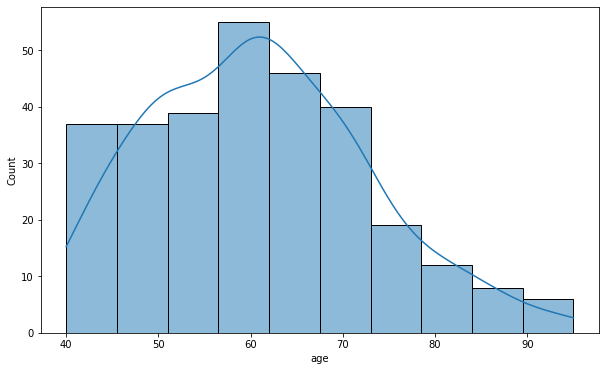

In [6]:
#We plot the distribution of the age of people in the dataset:
plt.figure(figsize=(10,6))
sns.histplot(data= heart_data, x = "age", kde=True)


<AxesSubplot:xlabel='age', ylabel='Density'>

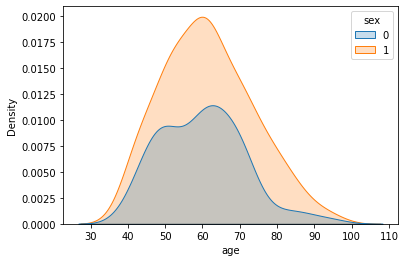

In [7]:
# We plot the distribution of the gender of the people coming in:
sns.kdeplot(data = heart_data,x= heart_data.age, hue='sex', shade=True)

<AxesSubplot:xlabel='sex', ylabel='Density'>

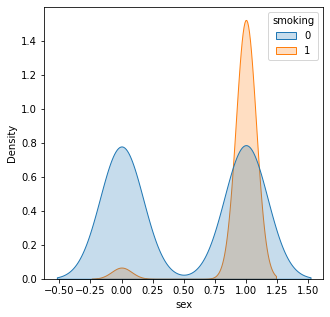

In [8]:
#To find out the density of the population between male and female genders divided into whether they smoke or not
plt.figure(figsize=(5,5))
sns.kdeplot(data = heart_data, x = heart_data.sex,hue='smoking', shade=True)

***We can see that there is no difference between the gender of the people diagnosed with heart disease.***

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<AxesSubplot:>

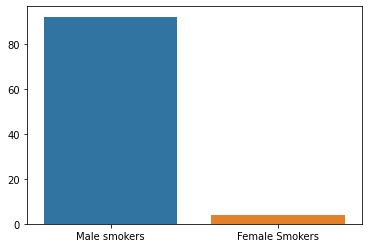

In [9]:
# #Checking out the number of smokers between genders(Assuming 1 for male and 0 for female gender)
male = heart_data[heart_data["sex"]==1]
female = heart_data[heart_data["sex"]==0]

male_smoker = male[heart_data["smoking"]==1]
female_smoker = female[heart_data["smoking"]==1]
smokers = [len(male_smoker),len(female_smoker)]
sns.barplot(y=smokers, x = ['Male smokers','Female Smokers'])

As we can see that the male population has 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


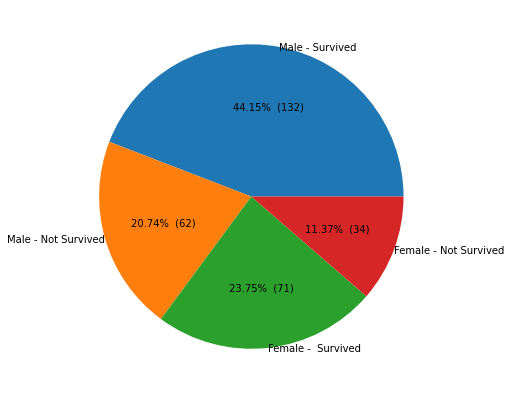

In [10]:
male_survi = male[heart_data["DEATH_EVENT"]==0]
male_not = male[heart_data["DEATH_EVENT"]==1]
female_survi = female[heart_data["DEATH_EVENT"]==0]
female_not = female[heart_data["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male_survi),len(male_not),
         len(female_survi),len(female_not)]
plt.figure(figsize=(7,7))
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(values, labels= labels, autopct=make_autopct(values),  labeldistance=1)
# plt.legend()
plt.show() 

We would now drill down even more to differentiate between the smokers and non-smokers between genders and find out their survival.

Text(0.5, 1.0, 'Distribution of survivers')

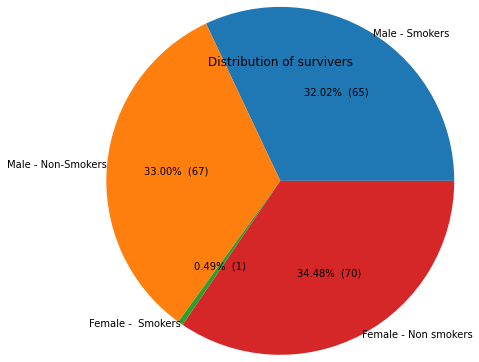

In [11]:
# Checking among the survivers:
male_survi_smoker = male_survi[male_survi['smoking']==1]
male_survi_non_smoker = male_survi[male_survi.smoking==0]

female_survi_smoker = female_survi[female_survi.smoking==1]
female_survi_non_smoker = female_survi[female_survi.smoking==0]

labels = ['Male - Smokers','Male - Non-Smokers', 'Female -  Smokers', 'Female - Non smokers']
values = [len(male_survi_smoker),len(male_survi_non_smoker),len(female_survi_smoker), len(female_survi_non_smoker)]


# plt.subplot(3,4,1)
plt.pie(values, labels= labels, autopct=make_autopct(values),  labeldistance=1 ,radius=2)
plt.title("Distribution of survivers")


We can see that among the survivers there isnot much difference between the smokers and the no-smokers for the male population but almost all the female population survivers are non-smokers. 

Text(0.5, 1.0, 'Distribution among the people who did not survive')

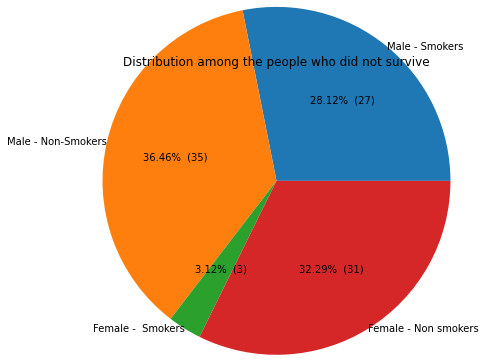

In [12]:
male_not_survi_smoker = male_not[male_not['smoking']==1]
male_not_survi_non_smoker = male_not[male_not['smoking']==0]
female_not_survi_smoker = female_not[female_not['smoking']==1]
female_not_survi_non_smoker = female_not[female_not['smoking']==0]
labels_not = ['Male - Smokers','Male - Non-Smokers', 'Female -  Smokers', 'Female - Non smokers']
values_not_survived = [len(male_not_survi_smoker),len(male_not_survi_non_smoker),len(female_not_survi_smoker), len(female_not_survi_non_smoker)]
plt.pie(values_not_survived,labels= labels_not, autopct=make_autopct(values_not_survived),  labeldistance=1, radius=2)
plt.title("Distribution among the people who did not survive")


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 41.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='creatinine_phosphokinase'>

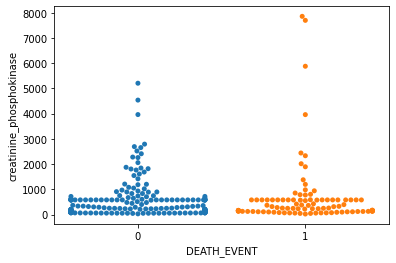

In [13]:
sns.swarmplot(data=heart_data, x = 'DEATH_EVENT', y = 'creatinine_phosphokinase',)

There is no particular relationship between the levels of creatinine_phosphokinase and Death Event.

# **2. We will now start with our Data Modelling:**
# A. Random Forrest Regressor

In [14]:
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [15]:
Features = ['time','ejection_fraction','serum_creatinine','platelets']
y = heart_data['DEATH_EVENT']
heart_data.drop(['DEATH_EVENT'], axis = 1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


We would not drop any data now and look at how the model performs. Since we do not have any explanation about time we dropped that column.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,mean_absolute_error,mean_squared_error


In [17]:
X_copy = heart_data[Features]
y_copy = y.copy()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, train_size=0.7, random_state=0, shuffle = True)
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
preds = model.predict(X_test)
ac = accuracy_score(y_test, preds)
mae = mean_absolute_error(preds,y_test)
print("Using Random Forrest Classifier:")
print(f'Model accuracy is: {ac*100}%')
print(f'Mean absolute error is: {mae}')

Using Random Forrest Classifier:
Model accuracy is: 86.66666666666667%
Mean absolute error is: 0.13333333333333333



#  B. XG BOOST:

In [19]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=100, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)
predictions = my_model.predict(X_test)
xg_ac = my_model.score(X_test, y_test)
print('For XG BOOST model')
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))
print(f'The model score for XG BOOST model is: {xg_ac}')


For XG BOOST model
Mean Absolute Error: 0.2339161004457209
The model score for XG BOOST model is: 0.495492540663958


> **AS you can see that XG BOOST did not perform better than Random Forrest Classifier. Therefore we go with the Random Forrest model.**

# ***Please let me know in the comments what do you think of my code. Thanks.***